# Анализ рынка заведений общественного питания Москвы

Необходимо провести анализ рынка заведений общественного питания г. Москвы, чтобы в дальнейшем принять решение об открытии кафе
(или сеть кафе) с инновационной идеей - обслуживание роботами.
Необходимо будет сформулировать рекомендации о географическом положении, типе и возможных
других параметрах планируемого к открытию
заведения.
В качестве источника данных были использованы
открытые данные о заведениях города Москвы с
портала mos.ru.

***
В этом проекте мы посмотрим на данные заведений общественного питания города Москвы, проанализируем их типы, местоположение и на основании анализа сможем дать некоторые рекомендация для развития бизнеса заказчика.

## Описание данных

Таблица `rest_data`:
* `id` — идентификатор объекта;
* `object_name` — название объекта общественного питания;
* `chain` — сетевой ресторан;
* `object_type` — тип объекта общественного питания;
* `address` — адрес;
* `number` — количество посадочных мест.

## Загрузка данных и предобработка

### Подготовка к исследованию

In [1]:
# Импорт библиотек
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly_express as px
from plotly import graph_objects as go

# Настройка общего вида графиков seaborn
sns.set(rc={"figure.dpi":100, 'savefig.dpi':300})
sns.set_context('notebook')
sns.set_style("ticks")
sns.set_theme(style="darkgrid")
sns.set_color_codes("pastel")

# Увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 9, 7

In [2]:
import plotly.io as pio
png_renderer = pio.renderers["png"]
png_renderer.width = 900
png_renderer.height = 700

pio.renderers.default = "png"

In [3]:
#Импорт входных данных
try:
    rest_data = pd.read_csv('/datasets/rest_data.csv')
    
except FileNotFoundError:
    rest_data = pd.read_csv('rest_data.csv')

#поменяем вывод float значений
pd.set_option('display.float_format', lambda x: '%.2f' % x)

Напишем стандартную функцию общего обзора данных.

In [4]:
# Функция вывода красивых таблиц
def nice_display(data, rows_num):
    print(f"Первые {rows_num} строк таблицы".center(127, "-"))
    display(data.head(rows_num).style.set_table_styles(
        [{'selector': 'tr:nth-of-type(odd)',
          'props': [('background', '#eee')]},
         {'selector': 'tr:nth-of-type(even)',
            'props': [('background', 'white')]},
            {'selector': 'th',
             'props': [('background', '#2DA679'),
                       ('color', 'white'),
                       ('font-family', 'verdana')]},
            {'selector': 'td',
             'props': [('font-family', 'verdana')]},
         ]
    ).hide_index())

In [5]:
# Стандартная функция общего обзора данных
def data_view(data):
    print("Общая структура данных".center(127, "-") + '\n')
    display(data.info())
    print(127 * '-' + '\n')
    print("Первые 10 строк таблицы".center(127, "-"))
    display(data.head(10).style.set_table_styles(
        [{'selector': 'tr:nth-of-type(odd)',
          'props': [('background', '#eee')]},
         {'selector': 'tr:nth-of-type(even)',
            'props': [('background', 'white')]},
            {'selector': 'th',
             'props': [('background', '#2DA679'),
                       ('color', 'white'),
                       ('font-family', 'verdana')]},
            {'selector': 'td',
             'props': [('font-family', 'verdana')]},
         ]
    ).hide_index())
    print(127 * '-' + '\n')
    print("Доля пропущенных значений по столбцам в таблице".center(127, "-"))
    display(data.isna().mean().sort_values(ascending=False))
    print(127 * '-' + '\n')
    print('Визуализируем пропущенные значения графиком'.center(127, "-"))
    sns.heatmap(data.isna(), yticklabels=False, cbar=False, cmap="YlGnBu");
    plt.show()
    print(127 * '-' + '\n')
    print(f"Количество полных дубликатов: {data.duplicated().sum()}\n")
    print(127 * '-' + '\n')
    print("Статистическая информация о числовых данных".center(127, "-"))
    display(data.describe())
    print(127 * '-' + '\n')

In [6]:
# функция перевода списка строк из регистра Camel в змеиный
def camel_to_snake(s_list):
    new_list = []
    for s in s_list:
        new_list.append(''.join(['_'+c.lower() if c.isupper() else c for c in s]).lstrip('_'))
    return new_list

### Обзор и предобработка данных

Изучим наш файл с данными.

-----------------------------------------------------Общая структура данных----------------------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


None

-------------------------------------------------------------------------------------------------------------------------------

----------------------------------------------------Первые 10 строк таблицы----------------------------------------------------


-------------------------------------------------------------------------------------------------------------------------------

----------------------------------------Доля пропущенных значений по столбцам в таблице----------------------------------------


id            0.00
object_name   0.00
chain         0.00
object_type   0.00
address       0.00
number        0.00
dtype: float64

-------------------------------------------------------------------------------------------------------------------------------

------------------------------------------Визуализируем пропущенные значения графиком------------------------------------------


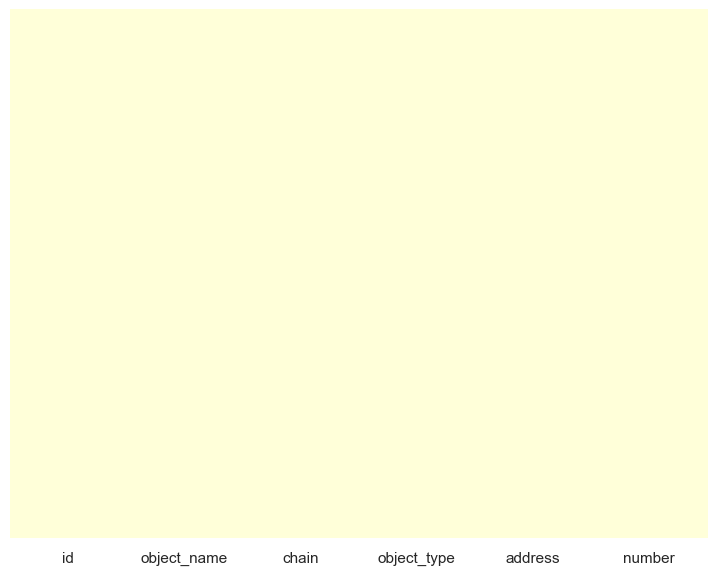

-------------------------------------------------------------------------------------------------------------------------------

Количество полных дубликатов: 0

-------------------------------------------------------------------------------------------------------------------------------

------------------------------------------Статистическая информация о числовых данных------------------------------------------


id   number
count  15366.00 15366.00
mean  119720.07    59.55
std    73036.13    74.74
min      838.00     0.00
25%    28524.00    12.00
50%   144974.50    40.00
75%   184262.25    80.00
max   223439.00  1700.00

-------------------------------------------------------------------------------------------------------------------------------



In [7]:
data_view(rest_data)

### Изменение типов данных

Сразу видим, что значения столбца `chain` являются логическими `да` и `нет`. Проверим это и приведем к типу данных `Boolean`.

In [8]:
rest_data['chain'].unique()

array(['нет', 'да'], dtype=object)

In [9]:
rest_data['chain'] = rest_data['chain'].replace('да', True)
rest_data['chain'] = rest_data['chain'].replace('нет', False)

In [10]:
rest_data.dtypes

id              int64
object_name    object
chain            bool
object_type    object
address        object
number          int64
dtype: object

### Проверка на дубликаты и уникальные значения

Проверим какие уникальные значения содержатся в столбце `object_type`.

In [11]:
rest_data['object_type'].unique()

array(['кафе', 'столовая', 'закусочная',
       'предприятие быстрого обслуживания', 'ресторан', 'кафетерий',
       'буфет', 'бар', 'магазин (отдел кулинарии)'], dtype=object)

Есть значения с похожими названиями, но согласно [открытым данным](https://data.mos.ru/opendata/7710881420-obshchestvennoe-pitanie-v-moskve) объектов общественного питания портала mos.ru, это общепринятые типы. 

Выше мы показали, что полных дубликатов строк в таблице нет. Посмотрим сколько есть неявных дубликатов в таблице: позиций, у которых совпадают имя, адрес и количество посадочных мест.

In [12]:
rest_data.duplicated(subset=['object_name', 'address', 'number']).sum()

87

Получили 87 полных дубликатов. Посмотрим на вид таких объектов.

In [13]:
nice_display(rest_data[rest_data.duplicated(subset=[
             'object_name', 'address', 'number'])].sort_values(['object_name']), 20)

----------------------------------------------------Первые 20 строк таблицы----------------------------------------------------


Судя по таблице с такими дубликатами мы не можем наверняка сказать одно и то же это заведение или нет. В торговых центрах или бизнес-центрах по одному и тому же адресу бывают заведения с одинаковыми названиями, просто на разных этажах. Поэтому удалять такие дубликаты нецелесообразны, можем испортить общую картину.

Также стоит учесть, что id у таких дубликатов все же разный, что подтверждает гипотезу о разных заведениях.

### Загрузка внешних данных

В этом проекте необходимо будет изучить также информацию о районах и округах, к которым относятся заведения. Для того, чтобы понять к какому району относится та или иная улица или заведение загрузим внешние данные о заведениях с портала [mos.ru](https://data.mos.ru/opendata/7710881420-obshchestvennoe-pitanie-v-moskve). 

Для удобства сохраним файл с данными в Google Docs.

In [14]:
from io import BytesIO
import requests
spreadsheet_id = '1u-be11zSb49HnZHHtGKphiroJNcZ9tLJLM4SDFcvbd4'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
ext_rest_data = pd.read_csv(BytesIO(r.content))

#### Обзор и предобработка внешних данных

Посмотрим из чего состоят внешние данные.

-----------------------------------------------------Общая структура данных----------------------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19327 entries, 0 to 19326
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19327 non-null  int64  
 1   Name              19327 non-null  object 
 2   global_id         19327 non-null  int64  
 3   IsNetObject       19327 non-null  object 
 4   OperatingCompany  3588 non-null   object 
 5   TypeObject        19327 non-null  object 
 6   AdmArea           19327 non-null  object 
 7   District          19327 non-null  object 
 8   Address           19327 non-null  object 
 9   PublicPhone       19327 non-null  object 
 10  SeatsCount        19327 non-null  int64  
 11  SocialPrivileges  19327 non-null  object 
 12  Longitude_WGS84   19327 non-null  float64
 13  Latitude_WGS84    19327 non-null  float64
dtypes: fl

None

-------------------------------------------------------------------------------------------------------------------------------

----------------------------------------------------Первые 10 строк таблицы----------------------------------------------------


-------------------------------------------------------------------------------------------------------------------------------

----------------------------------------Доля пропущенных значений по столбцам в таблице----------------------------------------


OperatingCompany   0.81
ID                 0.00
Name               0.00
global_id          0.00
IsNetObject        0.00
TypeObject         0.00
AdmArea            0.00
District           0.00
Address            0.00
PublicPhone        0.00
SeatsCount         0.00
SocialPrivileges   0.00
Longitude_WGS84    0.00
Latitude_WGS84     0.00
dtype: float64

-------------------------------------------------------------------------------------------------------------------------------

------------------------------------------Визуализируем пропущенные значения графиком------------------------------------------


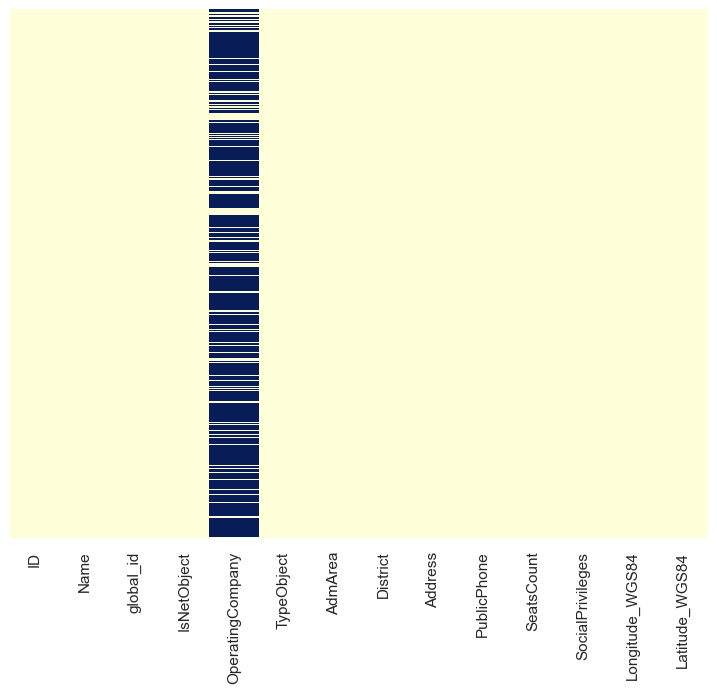

-------------------------------------------------------------------------------------------------------------------------------

Количество полных дубликатов: 0

-------------------------------------------------------------------------------------------------------------------------------

------------------------------------------Статистическая информация о числовых данных------------------------------------------


ID     global_id  SeatsCount  Longitude_WGS84  Latitude_WGS84
count  19327.00      19327.00    19327.00         19327.00        19327.00
mean  226301.84 1200015226.71       43.35            37.59           55.74
std   111593.90  595128588.85       65.37             0.12            0.09
min      838.00  637376221.00        0.00            36.86           55.21
25%   152613.50  639249801.50        5.00            37.53           55.69
50%   267039.00 1046154448.00       20.00            37.60           55.75
75%   317766.00 1146358671.00       50.00            37.66           55.79
max   361376.00 2375986733.00     1400.00            37.95           56.02

-------------------------------------------------------------------------------------------------------------------------------



In [15]:
data_view(ext_rest_data)

Приведем столбцы датафрейма в "змеиный_регистр" и приведем к таким же названиям столбцов, как в исходных данных, для удобства.

In [16]:
ext_rest_data.columns = camel_to_snake(ext_rest_data.columns)
ext_rest_data = ext_rest_data.rename(columns={
                                     'i_d': 'id', 'longitude__w_g_s84': 'longitude_wgs84', 
                                    'latitude__w_g_s84': 'latitude_wgs84', 'name':'object_name', 'type_object': 'object_type'})
#вывод новых названий столбцов
ext_rest_data.columns

Index(['id', 'object_name', 'global_id', 'is_net_object', 'operating_company',
       'object_type', 'adm_area', 'district', 'address', 'public_phone',
       'seats_count', 'social_privileges', 'longitude_wgs84',
       'latitude_wgs84'],
      dtype='object')

#### Обработка информации об адресе во внешних данных

По первому обзору данных видим, что информация в столбце `address` не одного формата. В некоторых строках поле адреса содержит еще информацию об округе и слова "Российская Федерация". Попробуем избавиться от это лишней информации и привести адрес в одинаковый вид.

Создадим новый датафрейм с адресами из внешних данных, разбитыми по запятой. Удалим из этого датафрейма столбцы, содержащие слова "округ" и с "Российская Федерация". Также для всех адресов добавим в начало "город Москва", если его там нет.

In [17]:
ext_address = ext_rest_data['address'].str.split(', ', expand=True)
ext_address[ext_address[0] == 'Российская Федерация'] = ext_address[ext_address[0] == 'Российская Федерация'].shift(
    periods=-1, axis="columns", fill_value=None)
ext_address

0                                                  1  \
0      город Москва                              улица Егора Абакумова   
1      город Москва                                   улица Талалихина   
2      город Москва  внутригородская территория муниципальный округ...   
3      город Москва                                    Угличская улица   
4      город Москва                             переулок Сивцев Вражек   
...             ...                                                ...   
19322  город Москва  внутригородская территория муниципальный округ...   
19323  город Москва                              Малая Филёвская улица   
19324  город Москва                                    Боровское шоссе   
19325  город Москва                                Ленинградское шоссе   
19326  город Москва                                     улица Пришвина   

                          2           3     4     5     6  
0                     дом 9        None  None  None  None  
1                   дом 2/1    корпус 1  None  None  None  
2      Абельмановская улица       дом 6  None  None   NaN  
3                    дом 17        None  None  None  None  
4                   дом 6/2        None  None  None  None  
...                     ...         ...   ...   ...   ...  
19322      Варшавское шоссе    дом 143А  None  None   NaN  
19323                дом 18        None  None  None  None  
19324                дом 2А    корпус 3  None  None  None  
19325               дом 16А  строение 8  None  None  None  
19326           владение 2А        None  None  None  None  

[19327 rows x 7 columns]

In [18]:
# Сдвинем все столбцы влево на 2 для тех строк, которые содержат округ
ext_address[ext_address[1].str.contains('округ')] = ext_address[ext_address[1].str.contains('округ')].shift(
    periods=-2, axis="columns", fill_value=None)

# Сдвинем вправо все столбцы, в котором в первом столбце нет "г.Москва"
ext_address[ext_address[0] != 'город Москва'] = ext_address[ext_address[0] != 'город Москва'].shift(
    periods=1, axis="columns", fill_value='город Москва')

# Заменим NaN на None
ext_address = ext_address.astype(object).replace(np.nan, 'None')
ext_address

0                       1            2           3     4  \
0      город Москва   улица Егора Абакумова        дом 9        None  None   
1      город Москва        улица Талалихина      дом 2/1    корпус 1  None   
2      город Москва    Абельмановская улица        дом 6        None  None   
3      город Москва         Угличская улица       дом 17        None  None   
4      город Москва  переулок Сивцев Вражек      дом 6/2        None  None   
...             ...                     ...          ...         ...   ...   
19322  город Москва        Варшавское шоссе     дом 143А        None  None   
19323  город Москва   Малая Филёвская улица       дом 18        None  None   
19324  город Москва         Боровское шоссе       дом 2А    корпус 3  None   
19325  город Москва     Ленинградское шоссе      дом 16А  строение 8  None   
19326  город Москва          улица Пришвина  владение 2А        None  None   

          5     6  
0      None  None  
1      None  None  
2      None  None  
3      None  None  
4      None  None  
...     ...   ...  
19322  None  None  
19323  None  None  
19324  None  None  
19325  None  None  
19326  None  None  

[19327 rows x 7 columns]

Мы получили датафрейм с полными адресами без лишних слов. Теперь "схлопнем" датафрейм в адрес.

In [19]:
# Функция "схлопывания" датафрейма в строку
def df_to_str(row):
    ans = row[0]
    for name in row[1:]:
        if (name != 'None'):                
            ans += ', ' + name
        else: return ans
    return ans    

In [20]:
ext_address['full'] = ext_address.apply(df_to_str, axis=1)

Заменим значения адресов в датафрейме внешних данных на обновленные и удалим ненужный датафрейм с адресами.

In [21]:
ext_rest_data['address'] = ext_address['full']
del ext_address
nice_display(ext_rest_data, 10)

----------------------------------------------------Первые 10 строк таблицы----------------------------------------------------


#### Удаление дубликатов во внешних данных

Т.к. внешние данные нам нужны только для дальнейшего поиска в них географической информации, удалим в них строки с одинаковыми адресами

In [22]:
ext_rest_data = ext_rest_data.drop_duplicates(subset=['address'],
                                              keep='last').reset_index(drop = True)

In [23]:
ext_rest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10189 entries, 0 to 10188
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 10189 non-null  int64  
 1   object_name        10189 non-null  object 
 2   global_id          10189 non-null  int64  
 3   is_net_object      10189 non-null  object 
 4   operating_company  1309 non-null   object 
 5   object_type        10189 non-null  object 
 6   adm_area           10189 non-null  object 
 7   district           10189 non-null  object 
 8   address            10189 non-null  object 
 9   public_phone       10189 non-null  object 
 10  seats_count        10189 non-null  int64  
 11  social_privileges  10189 non-null  object 
 12  longitude_wgs84    10189 non-null  float64
 13  latitude_wgs84     10189 non-null  float64
dtypes: float64(2), int64(3), object(9)
memory usage: 1.1+ MB


### Вывод

В этой части мы загрузили и обработали наши данные: изменили тип данных столбца `chain`, проверили на дубликаты. 
Хоть у нас есть некоторые совпадения заведений с одинаковым адресом и названием мы решили их не удалять, т.к. мы не можем наверняка сказать по одним этим данным одно и то же это заведение или нет.

Также, для того, чтобы дополнить нашу таблицу, мы загрузили внешние данные с таблицей заведений, содержащей также географические координаты и названия районов, к которым эти заведения относятся. Во внешних данных мы оставили только строки с разными адресами, т.к. из этих данных нам нужны только названия районов и координаты, относящиеся к этому адресу.

## Анализ данных

### Соотношение количества заведений по типу

Посчитаем количество объектов, относящихся к разным типам заведений, и построим распределение количества заведений по их виду из имеющихся данных.

In [24]:
rest_data_grouped = rest_data[['id', 'object_type']].groupby('object_type').agg(
    'count').sort_values('id', ascending=False).reset_index()
rest_data_grouped

object_type    id
0                               кафе  6099
1                           столовая  2587
2                           ресторан  2285
3  предприятие быстрого обслуживания  1923
4                                бар   856
5                              буфет   585
6                          кафетерий   398
7                         закусочная   360
8          магазин (отдел кулинарии)   273

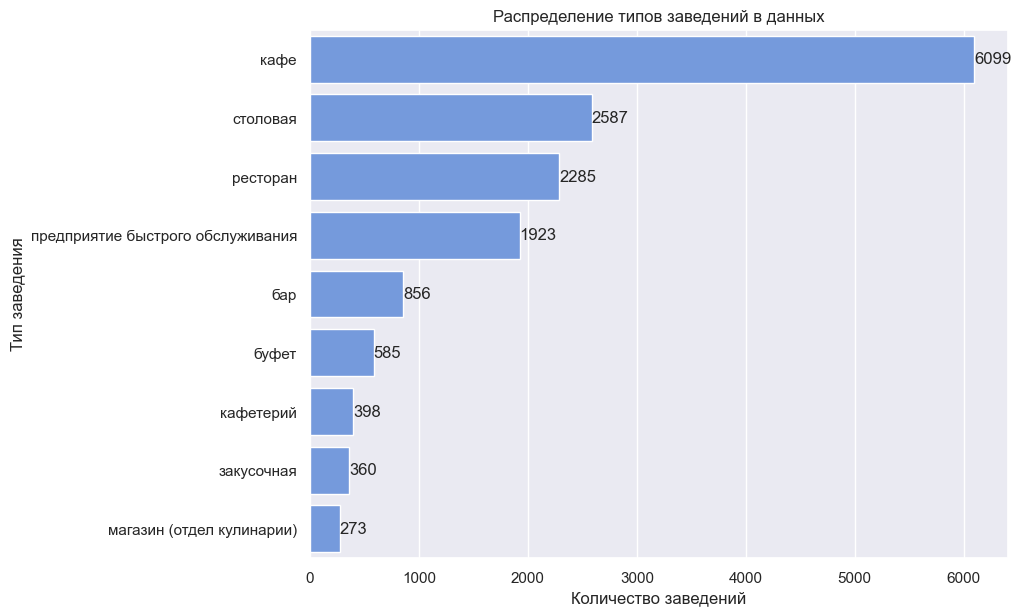

In [25]:
ax = sns.barplot(x='id', y='object_type', data=rest_data_grouped, color='cornflowerblue', orient='h')
plt.title('Распределение типов заведений в данных')
plt.xlabel('Количество заведений')
plt.ylabel('Тип заведения')
ax.bar_label(ax.containers[0]);

Отобразим круговую диаграмму, чтобы посмотреть доли каждого типа в наших данных.

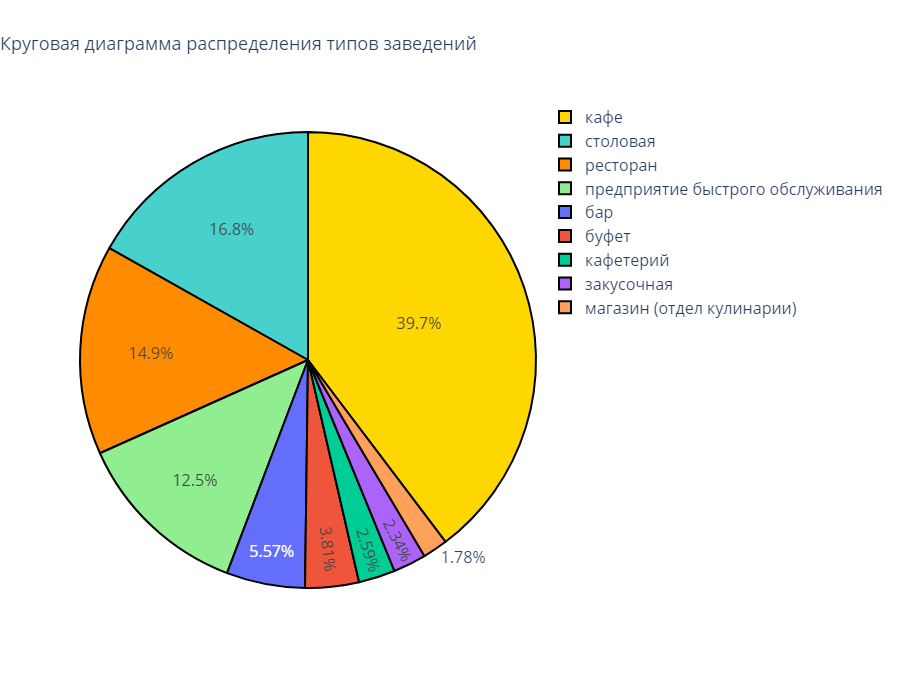

In [26]:
colors = ['gold', 'mediumturquoise', 'darkorange', 'lightgreen']
fig = go.Figure(data=[go.Pie(labels=rest_data_grouped['object_type'],
                values=rest_data_grouped['id'])])
fig.update_traces(hoverinfo='label+percent', textinfo='percent', textfont_size=16,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.update_layout(title_text='Круговая диаграмма распределения типов заведений',
                  title_x=0, title={'font': {'size': 18}}, legend={'font': {'size': 16}})
fig.show()

### Соотношение сетевых и несетевых заведений по количеству

Построим график количества сетевых и несетевых объектов в наших данных, определим их соотношение.

In [27]:
chain_data_grouped = rest_data[['id', 'object_type', 'chain']].groupby(['object_type', 'chain']).agg(
    'count').sort_values(['id', 'object_type'], ascending=False).reset_index()
chain_data_grouped

object_type  chain    id
0                                кафе  False  4703
1                            столовая  False  2584
2                            ресторан  False  1741
3                                кафе   True  1396
4   предприятие быстрого обслуживания  False  1132
5                                 бар  False   819
6   предприятие быстрого обслуживания   True   791
7                               буфет  False   574
8                            ресторан   True   544
9                           кафетерий  False   346
10                         закусочная  False   304
11          магазин (отдел кулинарии)  False   195
12          магазин (отдел кулинарии)   True    78
13                         закусочная   True    56
14                          кафетерий   True    52
15                                бар   True    37
16                              буфет   True    11
17                           столовая   True     3

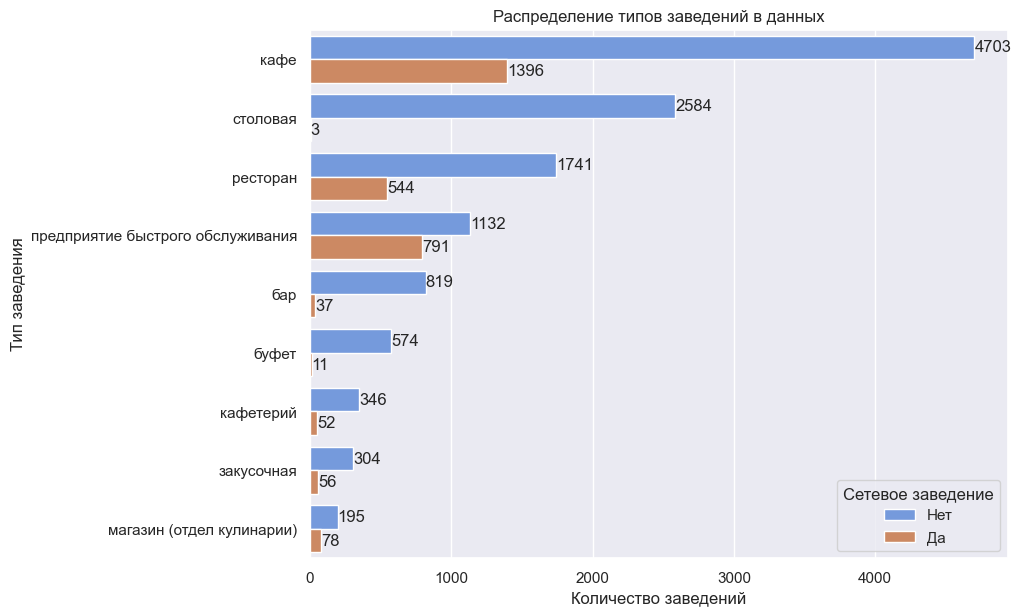

In [28]:
ax = sns.barplot(x='id', y='object_type', data=chain_data_grouped, orient='h', hue='chain', palette=["cornflowerblue", "C1"])
plt.xlabel('Количество заведений')
hands, labs = ax.get_legend_handles_labels()
plt.legend(title='Сетевое заведение', loc='lower right', labels=['Нет', 'Да'], handles=hands)
plt.ylabel('Тип заведения')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Распределение типов заведений в данных');

По графику видно, что в наших данных больше всего сетевых заведений типа "Кафе" (как и в целом всех заведений). Но для наглядности и лучшего понимания необходимо оценить относительные доли сетевых заведений.

Создадим таблицу с отношением сетевых заведений к общему количеству, чтобы оценить у какого типа заведений более популярно сетевое распространение.

In [29]:
chain_pivot = rest_data.pivot_table(index = 'object_type', values = 'chain', 
                            aggfunc = ['count', 'sum', 'mean', lambda x: 1 - x.mean()])
chain_pivot.columns = ['Общее кол-во объектов', 'Кол-во сетевых', 'Доля сетевых', 'Доля НЕсетевых']
chain_pivot[['Доля сетевых', 'Доля НЕсетевых']] = chain_pivot[['Доля сетевых', 'Доля НЕсетевых']].round(3)
chain_pivot = chain_pivot.reset_index().sort_values('Доля сетевых', ascending=False)
chain_pivot.style.format({'Доля сетевых': '{:.1%}', 'Доля НЕсетевых': '{:.1%}'})

Построим график соотношения сетевых и несетевых объектов.

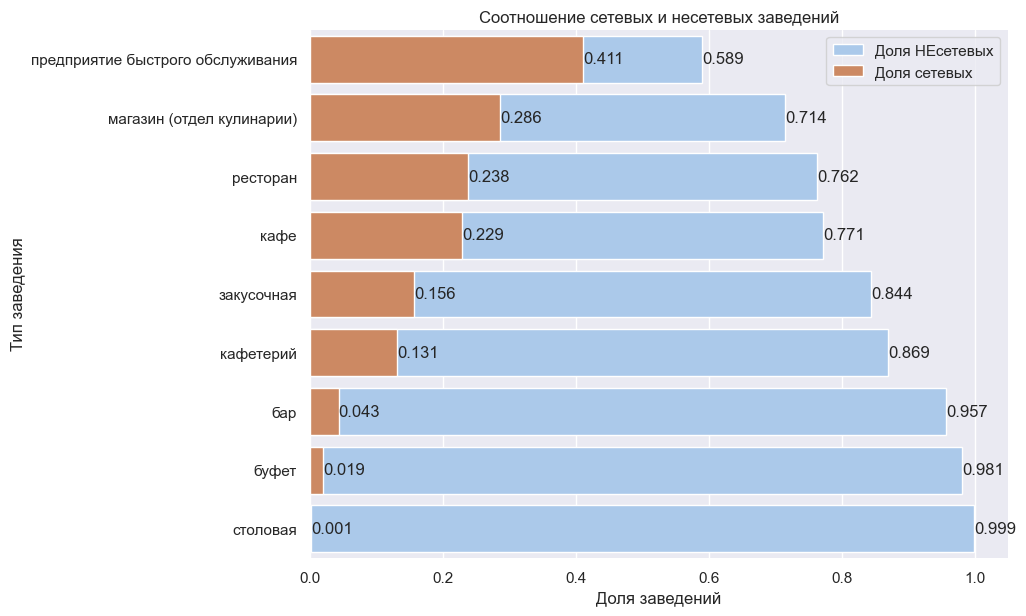

In [30]:
f, ax = plt.subplots(figsize = (9,7))
sns.set_color_codes('pastel')
sns.barplot(x = 'Доля НЕсетевых', y = 'object_type', data = chain_pivot,
            label = 'Доля НЕсетевых', color = 'b', edgecolor = 'w').bar_label(ax.containers[0])
sns.set_color_codes('muted')
sns.barplot(x = 'Доля сетевых', y = 'object_type', data = chain_pivot,
            label = 'Доля сетевых', color = 'C1', edgecolor = 'w').bar_label(ax.containers[1])
ax.legend(ncol = 1, loc = 'upper right')
sns.despine(left = True, bottom = True)
plt.xlabel('Доля заведений')
plt.ylabel('Тип заведения')
plt.title('Соотношение сетевых и несетевых заведений')
plt.show()
sns.set_color_codes("pastel")

Из графика видно, что самый большой процент сетевых заведений у "Предприятий быстрого обслуживания". На втором месте идут отделы кулинарии в магазинах, но нам они интересны не будут - скорее всего заведение с роботами мы не хотим открывать в магазине.

В итоге отметим, что в контексте распространенности сетевых заведений самыми популярными у нас будут:
* Предприятия быстрого обслуживания
* Ресторан
* Кафе

### Анализ количества мест в сетевых заведениях

Посмотрим на распределение количества мест в сетевых заведениях. 

In [31]:
# Создадим таблицу только сетевых заведений
chain_rest = rest_data.query('chain == True').copy()

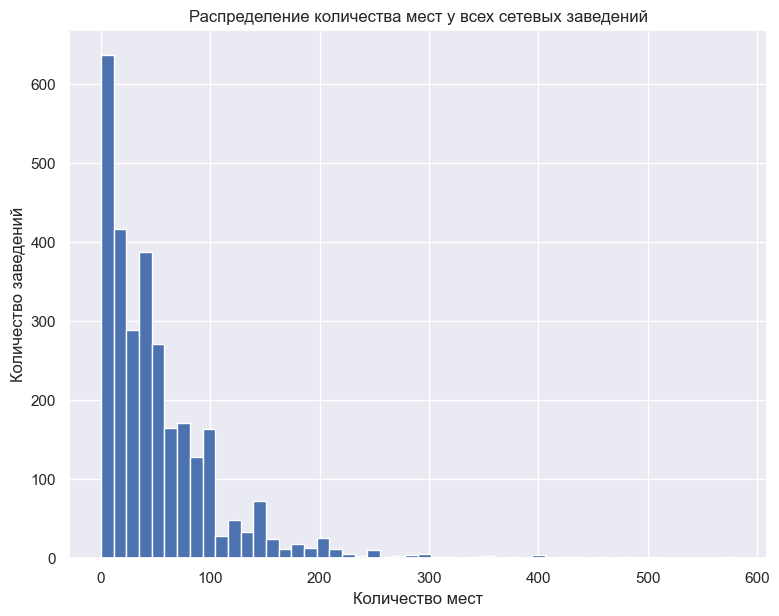

In [32]:
plt.hist(chain_rest['number'], bins=50)
plt.title('Распределение количества мест у всех сетевых заведений')
plt.xlabel('Количество мест')
plt.ylabel('Количество заведений');

Так как это сетевые заведения, имеет смысл сгруппировать их по названию, посчитать количество ресторанов в каждой сети и оценить количество мест по медиане.

In [33]:
chain_rest_grouped = chain_rest.groupby('object_name').agg({'id': 'count', 'number':'median'}).reset_index()
chain_rest_grouped = chain_rest_grouped.rename(columns={'id': 'chain_count', 'number': 'median_number'})
nice_display(chain_rest_grouped, 10)

----------------------------------------------------Первые 10 строк таблицы----------------------------------------------------


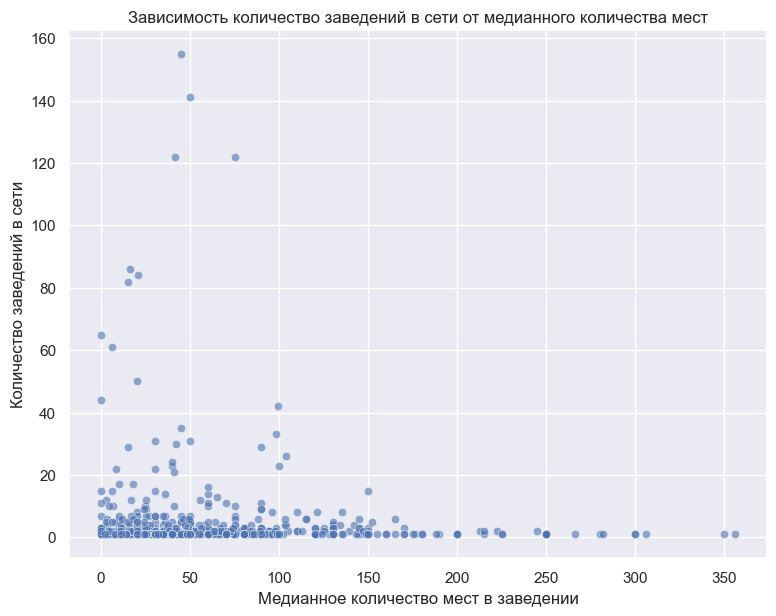

In [34]:
sns.scatterplot(x='median_number', y='chain_count', data=chain_rest_grouped, alpha=0.6)
plt.title('Зависимость количество заведений в сети от медианного количества мест')
plt.xlabel('Медианное количество мест в заведении')
plt.ylabel('Количество заведений в сети');

Из графика видно, что для самых распространенных сетевых заведений число мест не превышает 100. Для сетей с количеством заведений меньше 20, число мест очень сильно варьируется. Это нам на руку, есть возможность создать сеть с больше, чем 10-ю заведениями, и рассчитывать на 100-150 мест в каждом.

### Среднее количество мест по типу заведения

Посчитаем среднее количество мест для каждого типа заведения, округлим это среднее до целого.

In [35]:
type_data_grouped = rest_data.groupby(
    'object_type', as_index=False).agg({'number': 'mean'})
type_data_grouped = type_data_grouped.rename(
    columns={'number': 'mean_number'}).sort_values('mean_number', ascending=False)
type_data_grouped['mean_number'] = type_data_grouped['mean_number'].round(0)
nice_display(type_data_grouped, 9)

-----------------------------------------------------Первые 9 строк таблицы----------------------------------------------------


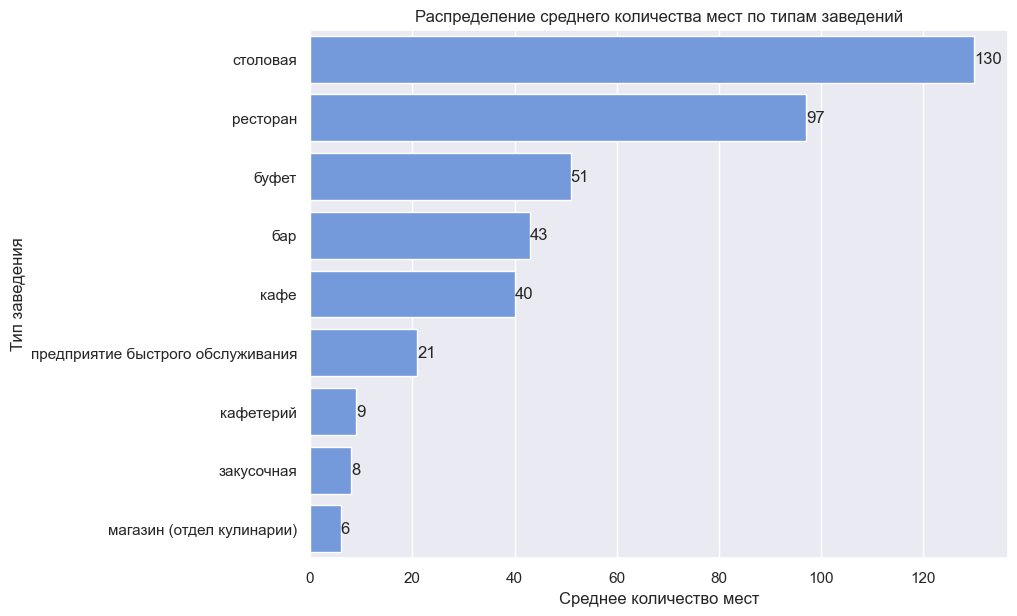

In [36]:
ax = sns.barplot(x='mean_number', y='object_type',
                 data=type_data_grouped, color='cornflowerblue', orient='h')
plt.title('Распределение среднего количества мест по типам заведений')
plt.xlabel('Среднее количество мест')
plt.ylabel('Тип заведения')
ax.bar_label(ax.containers[0]);

In [37]:
type_data_grouped = rest_data.groupby(
    'object_type', as_index=False).agg({'number': 'median'})
type_data_grouped = type_data_grouped.rename(
    columns={'number': 'median_number'}).sort_values('median_number', ascending=False)
nice_display(type_data_grouped, 9)

-----------------------------------------------------Первые 9 строк таблицы----------------------------------------------------


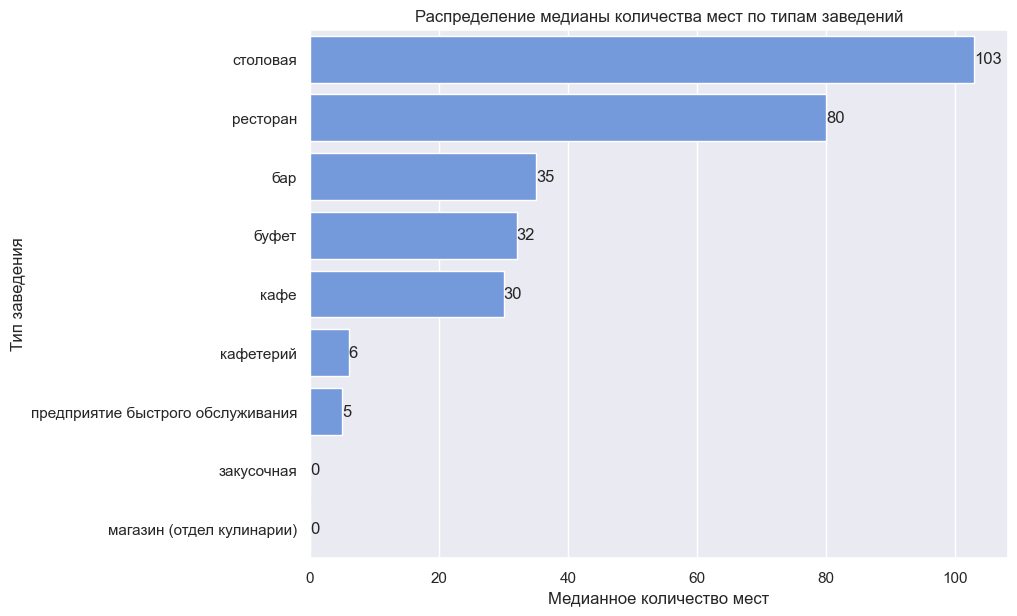

In [38]:
ax = sns.barplot(x='median_number', y='object_type',
                 data=type_data_grouped, color='cornflowerblue', orient='h')
plt.title('Распределение медианы количества мест по типам заведений')
plt.xlabel('Медианное количество мест')
plt.ylabel('Тип заведения')
ax.bar_label(ax.containers[0]);

Из графика видно, что в среднем самым большим заведением будет столовая, на втором месте - ресторан. Предприятие быстрого обслуживание в среднем имеет 21 посадочное место - далеко не самое большое количество.

### Топ-10 улиц по количеству заведений

Теперь посмотрим на каких улицах находится больше всего заведений общественного питания. Для этого сначала необходимо выделить название улицы из адреса.

#### Выделение улицы из адреса

In [39]:
type_data_grouped = rest_data.groupby(
    'object_type', as_index=False).agg({'number': 'median'})
type_data_grouped = type_data_grouped.rename(
    columns={'number': 'median_number'}).sort_values('median_number', ascending=False)
nice_display(type_data_grouped, 9)

-----------------------------------------------------Первые 9 строк таблицы----------------------------------------------------


Разделим сначала строку с адресом на датафрейм с адресом.

In [40]:
address = rest_data['address'].str.split(', ', expand=True)
nice_display(address, 10)
nice_display(address.tail(10), 10)

----------------------------------------------------Первые 10 строк таблицы----------------------------------------------------


----------------------------------------------------Первые 10 строк таблицы----------------------------------------------------


Проверим, что в 0 столбце разложенного адреса у нас только г. Москва.

In [41]:
address[0].unique()

array(['город Москва', 'Партизанская улица', 'Поречная улица',
       '1-й Нагатинский проезд', 'Софийская набережная',
       'Нижний Таганский тупик', 'Николоямская улица', 'улица Каманина',
       'Погодинская улица', 'Большая Бронная улица',
       '2-я Брестская улица', 'Профсоюзная улица', 'Калашный переулок',
       'Солянский тупик', 'улица Земляной Вал', 'Таганская площадь',
       'проезд Добролюбова', 'улица Обручева', 'Вспольный переулок',
       'улица Ленинская Слобода', 'Дербеневская улица',
       'Проектируемый проезд N 5231', 'Ленинский проспект',
       'Новоданиловская набережная', '5-й Котельнический переулок',
       'улица Знаменка', 'Школьная улица', 'поселение Сосенское',
       'Полевая улица', 'поселение Марушкинское',
       'поселение Михайлово-Ярцевское', 'город Московский',
       'Митинская улица', 'Чертановская улица', 'Варшавское шоссе',
       'улица Миклухо-Маклая', '1-я Тверская-Ямская улица',
       'Краснобогатырская улица', 'город Троицк', 'Медын

In [42]:
address[address[0]!='город Москва']

0                1           2     3     4  \
859             Партизанская улица           дом 30        None  None  None   
860             Партизанская улица           дом 30        None  None  None   
1491                Поречная улица         дом 5/14  строение 1  None  None   
7691        1-й Нагатинский проезд           дом 10        None  None  None   
7827          Софийская набережная         дом 26/1  строение 1  None  None   
...                            ...              ...         ...   ...   ...   
13185             Бауманская улица            дом 7  строение 3  None  None   
13399              Солянский тупик          дом 1/4  строение 1  None  None   
13991            Таганская площадь           дом 88  строение 4  None  None   
14003  Шарикоподшипниковская улица            дом 5  строение 1  None  None   
15015       поселение "Мосрентген"  деревня Дудкино  владение 1  None  None   

          5     6  
859    None  None  
860    None  None  
1491   None  None  
7691   None  None  
7827   None  None  
...     ...   ...  
13185  None  None  
13399  None  None  
13991  None  None  
14003  None  None  
15015  None  None  

[71 rows x 7 columns]

Получили, что 71 адрес у нас начинается не со слов 'город Москва', а мы изучаем данные только по Москве. Исправим это. Добавим для этих строк в 0 столбец г. Москва.

In [43]:
address[address[0] != 'город Москва'] = address[address[0] != 'город Москва'].shift(
    periods=1, axis="columns", fill_value='город Москва')

In [44]:
# проверка исправлений
address[0].unique()

array(['город Москва'], dtype=object)

Добавили в датафрейм адресов "город Москва" в начало.

Видим, что в строке адреса название улицы не всегда находится на второй позиции. Есть еще названия, в которых присутствует названия городов внутри Москвы, поселения, деревни и т.д. Имеет смысл эти части сохранять в выделенном названии улицы, потому что в Москве и в селении названия улицы могут совпадать. Из этого примем, что название улицы - это полный текст адреса без строки "г. Москва" до обозначения дома, строения и т.д.

In [45]:
# список слов, определяющий название улицы
street_words = ['улица','ул','переулок','шоссе','проспект','площадь','проезд',
         'село','аллея','бульвар','набережная','тупик','линия']
# список слов, обозначающий конец названия улицы
house_words = ['корпус ', 'дом ', 'строение ', 'домовладение ', 'владение ', 'участок ']

# функция составления названия улицы из датафрейма 
def address_to_street(row):
    ans = ''
    #Отсчет ведем со столбца 1, в столбце 0 у нас г. Москва
    for name in row[1:]:
        if name != None:
            #поиск стоп-слов в строке
            for word in house_words:
                if word in name:
                    
                    #возвращаем строку без "," и ' '
                    return ans[:-2]
                
            ans += name +', '
        else: return ans

Применим функцию к датафрейму адресов.

In [46]:
streets = address.apply(address_to_street, axis=1)

Проверим, что в списке улиц нет пустых строк или строк с None.

In [47]:
display(streets.isnull().sum())
display((streets=='').sum())

0

0

Добавим столбец с выделенным названием улицы в датафрейм.

In [48]:
rest_data['street_name'] = streets
nice_display(rest_data, 10)

----------------------------------------------------Первые 10 строк таблицы----------------------------------------------------


Проверим, что в результате добавления названия улицы не появилось пустых строк.

In [49]:
rest_data.isna().sum()

id             0
object_name    0
chain          0
object_type    0
address        0
number         0
street_name    0
dtype: int64

#### Создание базы соответствия улицы, района и округа 

Выделим название улицы из наших внешних данных, загруженных ранее, таким же образом.

In [50]:
ext_address = ext_rest_data['address'].str.split(', ', expand=True)

In [51]:
ext_rest_data['street_name'] = ext_address.apply(address_to_street, axis=1)

Создадим таблицу соответствия улицы, района и округа. Учтем, что одной улице могут соответствовать разные районы.

In [52]:
street_district_full = ext_rest_data[['street_name', 'district', 'adm_area']].drop_duplicates(
    subset=['street_name', 'district'], keep='last')

In [53]:
street_district_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2461 entries, 10 to 10188
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   street_name  2461 non-null   object
 1   district     2461 non-null   object
 2   adm_area     2461 non-null   object
dtypes: object(3)
memory usage: 76.9+ KB


Получили таблицу из 2489 строк. Посмотрим сколько в ней уникальных названий районов и улиц.

In [54]:
print(f' Уникальных названий улиц во внешней таблице: {street_district_full["street_name"].nunique()}\n',
      f'Уникальных названий районов во внешней таблице: {street_district_full["district"].nunique()}\n',
      f'Уникальных названий округов во внешней таблице: {street_district_full["adm_area"].nunique()}')

 Уникальных названий улиц во внешней таблице: 2119
 Уникальных названий районов во внешней таблице: 146
 Уникальных названий округов во внешней таблице: 12


Сгруппируем эту таблицу так, чтобы для каждой улицы, которая проходит через несколько районов и округов, создался список районов или округов в столбце.

In [55]:
street_district_full

street_name                 district  \
10     Филипповский переулок              район Арбат   
36     улица Демьяна Бедного  район Хорошёво-Мнёвники   
48     Бригадирский переулок          Басманный район   
54      Нахимовский проспект      Ломоносовский район   
63             Верхняя улица            район Беговой   
...                      ...                      ...   
10184       Варшавское шоссе    район Чертаново Южное   
10185  Малая Филёвская улица     район Фили-Давыдково   
10186        Боровское шоссе           район Солнцево   
10187    Ленинградское шоссе         Войковский район   
10188         улица Пришвина           район Бибирево   

                                      adm_area  
10          Центральный административный округ  
36      Северо-Западный административный округ  
48          Центральный административный округ  
54         Юго-Западный административный округ  
63             Северный административный округ  
...                                        ...  
10184             Южный административный округ  
10185          Западный административный округ  
10186          Западный административный округ  
10187          Северный административный округ  
10188  Северо-Восточный административный округ  

[2461 rows x 3 columns]

In [56]:
street_district = street_district_full.groupby(
    'street_name', as_index=False).agg({'district': 'unique', 'adm_area': 'unique'})

In [57]:
nice_display(street_district, 10)

----------------------------------------------------Первые 10 строк таблицы----------------------------------------------------


Превратим в этой таблице списки районов и округов в строки, разделенные запятой.

In [58]:
street_district['district'] = street_district['district'].apply(lambda x: ', '.join(map(str, x)))
street_district['adm_area'] = street_district['adm_area'].apply(lambda x: ', '.join(map(str, x)))

In [59]:
nice_display(street_district, 15)

----------------------------------------------------Первые 15 строк таблицы----------------------------------------------------


#### Добавление информации о районе, округе и геоданных

Ранее мы загрузили внешние данные по объектам общественного питания с дополнительной информацией. Добавим из них в нашу таблицу информацию о районе, округе и геоданные для каждого заведения. Таблицы будем объединять по адресу (в датафрейме внешних данных они у нас уникальные).

In [60]:
full_rest_data = rest_data.merge(ext_rest_data[['address', 'adm_area', 'district', 'longitude_wgs84',
                                                'latitude_wgs84']], 
                                 how='left', 
                                 left_on=['address'], 
                                 right_on=['address'])

In [61]:
nice_display(full_rest_data, 5)

-----------------------------------------------------Первые 5 строк таблицы----------------------------------------------------


Посмотрим какое количество пропущенных данных получилось в новой таблице.

In [62]:
full_rest_data.isna().sum().sort_values(ascending=False)

adm_area           2556
district           2556
longitude_wgs84    2556
latitude_wgs84     2556
id                    0
object_name           0
chain                 0
object_type           0
address               0
number                0
street_name           0
dtype: int64

То есть для 2556 адресов во внешних данных не нашлось полных совпадений адресов. Для таких адресов возьмем информацию из таблицы соответствия улиц и района. Сначала выделим пропущенные значения, а потом объединим данные с таблицей соотвествия.

In [63]:
completed_data = full_rest_data[['street_name']].merge(street_district, how='left', on='street_name')
nice_display(completed_data, 5)

-----------------------------------------------------Первые 5 строк таблицы----------------------------------------------------


In [64]:
completed_data.isna().sum()

street_name      0
district       257
adm_area       257
dtype: int64

Добавим полученные таким образом районы и округа в совмещенную таблицу и проверим количество пропущенных значений.

In [65]:
full_rest_data.loc[full_rest_data['adm_area'].isna(), 'adm_area'] = completed_data['adm_area']
full_rest_data.loc[full_rest_data['district'].isna(), 'district'] = completed_data['district']

Проверим количество пропусков после заполнения.

In [66]:
full_rest_data.isna().sum().sort_values(ascending=False)

longitude_wgs84    2556
latitude_wgs84     2556
adm_area            257
district            257
id                    0
object_name           0
chain                 0
object_type           0
address               0
number                0
street_name           0
dtype: int64

Теперь в нашей таблице нет названий районов и округов только для 257 заведений. Отфильтруем такие строки, будем считать что такие данные неактуальны (скорее всего заведений на этих улицах уже нет).

In [67]:
full_rest_data_filtered = full_rest_data.dropna(subset=['district'])

Также посмотрим сколько у нас строк с улицами, в которых больше чем один район.

In [68]:
print('Количество строк с улицами, находящимися в нескольких районах:',
      f'{full_rest_data_filtered[full_rest_data_filtered["district"].str.contains(",")]["id"].count()}')

Количество строк с улицами, находящимися в нескольких районах: 784


Лучше их тоже отфильтровать, чтобы такие заведения не участвовали в дальнейших расчетах - сложно будет оценить в каком конкретно районе находится заведение для которого не нашлось точного совпадения адреса во внешних данных.

In [69]:
full_rest_data_filtered = full_rest_data_filtered.drop(
    full_rest_data_filtered[full_rest_data_filtered["district"].str.contains(",")].index)

In [70]:
print('Теперь количество строк с улицами, находящимися в нескольких районах:',
      f'{full_rest_data_filtered[full_rest_data_filtered["district"].str.contains(",")]["id"].count()}')

Теперь количество строк с улицами, находящимися в нескольких районах: 0


In [71]:
# Удалим лишние переменные.
del chain_pivot, chain_data_grouped, chain_rest, chain_rest_grouped, ext_address, ext_rest_data, completed_data

#### Топ-10 улиц по количеству заведений

Сгруппируем наши заведения по названию улицы, района и округа, посчитаем количество заведений на каждой улице.

In [72]:
rest_data_street = full_rest_data_filtered[['street_name', 'district', 'adm_area', 'id']].groupby(
    by=['street_name', 'district', 'adm_area'], as_index=False).agg({'id': 'count'})
rest_data_street.columns = ['street_name', 'district', 'adm_area', 'id_count']

Составим топ-10 из этих улиц.

In [73]:
streets_top = rest_data_street.sort_values(by='id_count', ascending=False).head(10)
nice_display(streets_top, 10)

----------------------------------------------------Первые 10 строк таблицы----------------------------------------------------


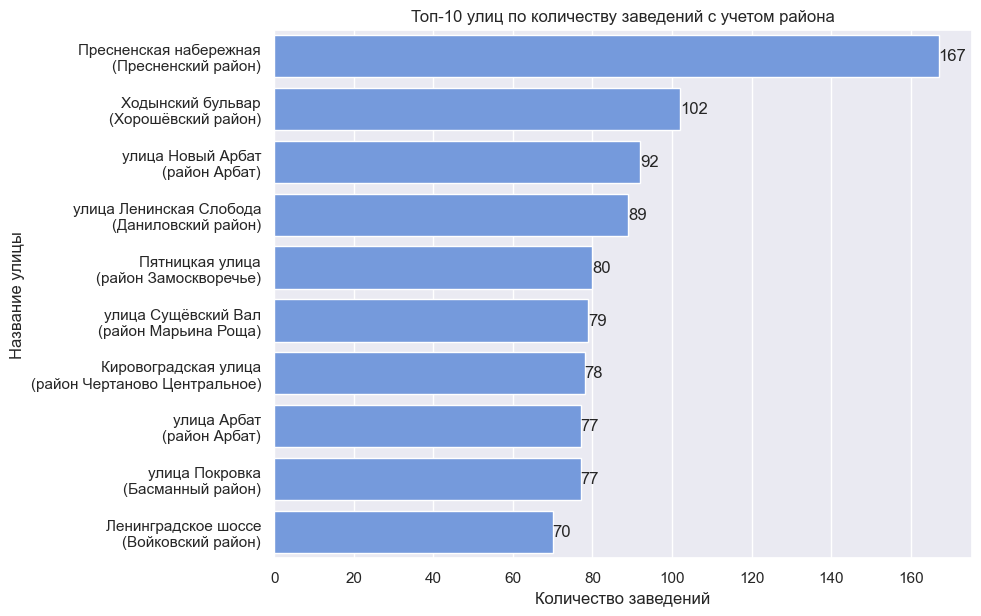

In [74]:
ax = sns.barplot(x='id_count', y='street_name',
                 data=streets_top, color='cornflowerblue', orient='h')
plt.title('Топ-10 улиц по количеству заведений с учетом района')
plt.xlabel('Количество заведений')
plt.ylabel('Название улицы')
ax.set_yticklabels(streets_top['street_name'] +
                   '\n(' + streets_top['district'] + ')')
ax.bar_label(ax.containers[0]);

Получили список улиц с самым большим количеством заведений (с указанием района). С одной стороны это значит, что эти улицы популярны и скорее всего имеет высокую проходимость, но с другой - сильная конкуренция обеспечена. Стоит грамотно выбрать тип нашего нового заведения.

### Улицы и районы с наименьшим количеством заведений

Посмотрим на нашу сгруппированную таблицу и посчитаем количество улиц на которых находится одно заведение.

In [75]:
print(f'Количество улиц с всего одним заведением: {rest_data_street.query("id_count == 1")["id_count"].count()}')

Количество улиц с всего одним заведением: 578


Посмотрим в каких районах находятся эти улицы: сгруппируем по району и посчитаем общее количество заведений в районе, отсортируем этот список по убыванию.

In [76]:
least_amount_district = rest_data_street.query("id_count == 1").groupby(
    'district', as_index=False).agg({'id_count': 'sum'}).sort_values('id_count', ascending=False)

Посмотрим в каком районе самое большое количество улиц с одним заведением. Для наших целей имеет смысл рассматривать именно такие районы, ведь если в них самое большое количество улиц с одним заведением, то мы можем сказать, что на каких-то из этих улиц есть недостаток заведений общественного питания.

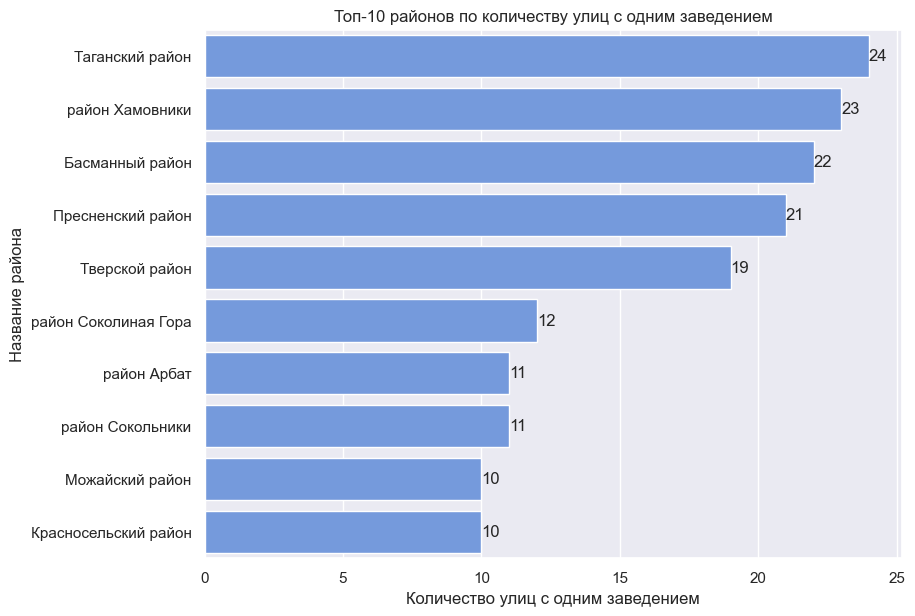

In [77]:
ax = sns.barplot(x='id_count', y='district',
                 data=least_amount_district.head(10), color='cornflowerblue', orient='h')
plt.title('Топ-10 районов по количеству улиц с одним заведением')
plt.xlabel('Количество улиц с одним заведением')
plt.ylabel('Название района')
ax.bar_label(ax.containers[0]);

Получили список районов с самым большим количеством улиц с одним заведением. Этими улицами, конечно, могут быть тупиковые переулки, но стоит обратить внимание именно на эти районы. Возможно, каким-то улицам как раз не хватает еще одного пункта общественного питания.

### Тепловые карты распределения заведений по районам

#### Тепловая карта общего количества заведений по районам

Посмотрим на распределение количества заведений по районам, сгруппируем по районам.

In [78]:
district_filtered = full_rest_data_filtered.groupby(by=['district'], as_index=False).agg({'id': 'count'})
district_filtered.columns = ['district', 'count']

Уберем из названия района слово "район", чтобы в дальнейшем соотнести названия с внешней базой.

In [79]:
bad_word = ['район']
f = lambda x: ' '.join([item for item in x.split() if item not in bad_word])
district_filtered['district'] = district_filtered['district'].apply(f)

Воспользуемся картой районов Москвы, чтобы построить тепловую карту распределения количества заведений в каждом районе.
[Ссылка на данные](https://gis-lab.info/qa/moscow-atd.html)

In [80]:
from urllib.request import urlopen
import json
with urlopen('http://gis-lab.info/data/mos-adm/mo.geojson') as response:
    counties = json.load(response)

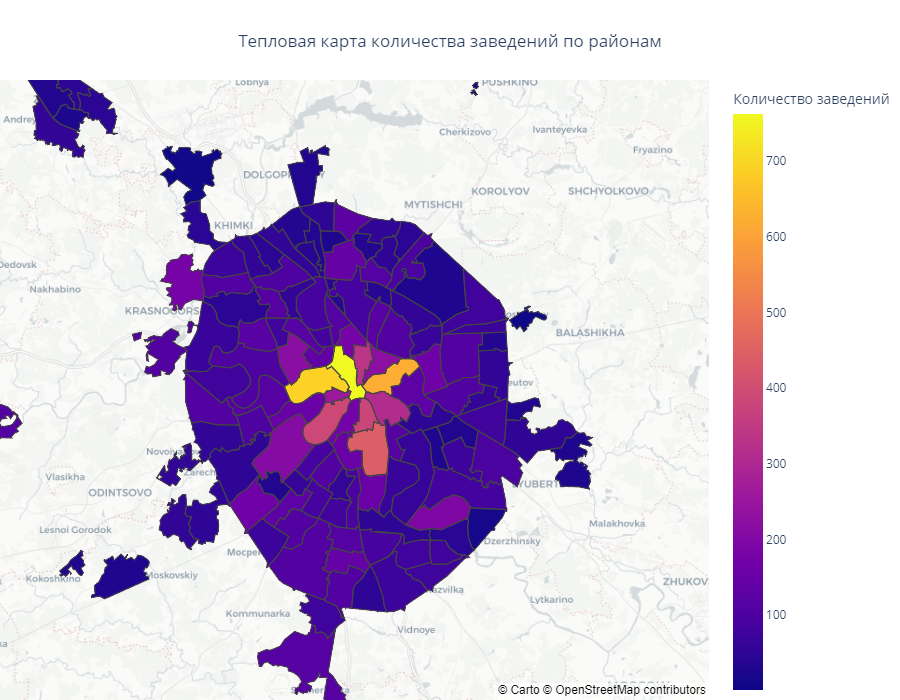

In [81]:
fig = px.choropleth_mapbox(district_filtered, geojson=counties, color="count",
                           locations="district", featureidkey="properties.NAME",
                           hover_name='district',
                           hover_data=['count'],
                           center={"lat": 55.7558, "lon": 37.6173},
                           mapbox_style="carto-positron", zoom=8.9,
                           title='Тепловая карта количества заведений по районам',
                           labels={'count':'Количество заведений', 'district':'Район'}
                              )
fig.update_layout(
    title_x=0.5,
    title_y=0.95,
    margin={"l": 0, "r": 0, "b": 0, "t": 80}
)
fig.show()

#### Тепловая карта районов с количеством улиц с одним заведением

Покажем теперь тепловую карту районов с количеством улиц, на которых одно заведение. Такие районы мы находили выше.

In [82]:
# удалим слово "район"
least_amount_district['district'] = least_amount_district['district'].apply(f)

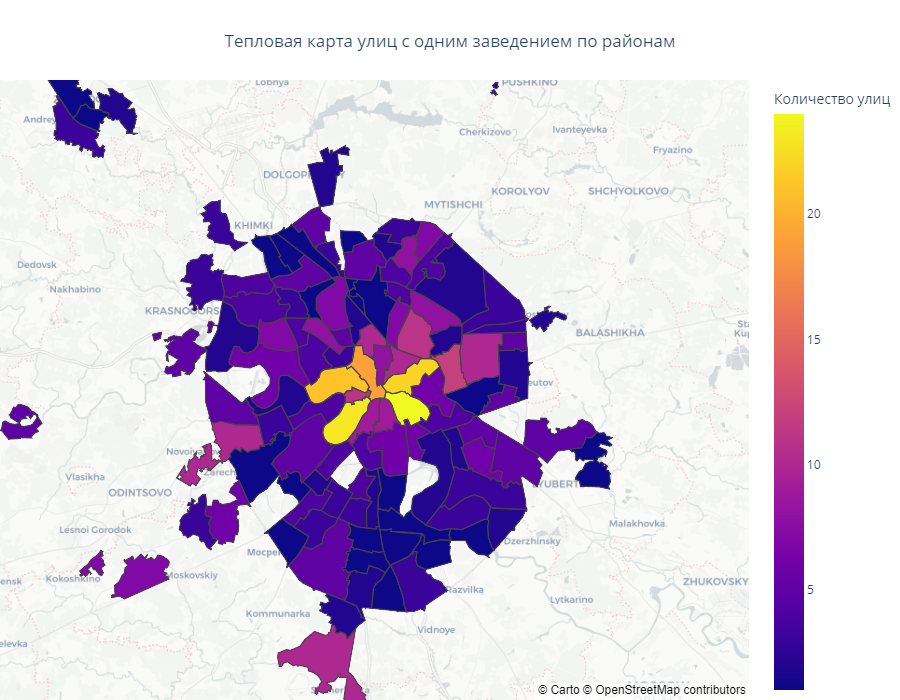

In [83]:
fig = px.choropleth_mapbox(least_amount_district, geojson=counties, color="id_count",
                           locations="district", featureidkey="properties.NAME",
                           hover_name='district',
                           hover_data=['id_count'],
                           center={"lat": 55.7558, "lon": 37.6173},
                           mapbox_style="carto-positron", zoom=8.9,
                           title='Тепловая карта улиц с одним заведением по районам',
                           labels={'id_count':'Количество улиц', 'district':'Район'}
                              )
fig.update_layout(
    title_x=0.5,
    title_y=0.95,
    margin={"l": 0, "r": 0, "b": 0, "t": 80}
)
fig.show()

#### Тепловая карта типов заведений по районам

Для того, чтобы дополнить наш анализ, сделаем группировку по типу заведения и по районам. Посчитаем общее количество заведений каждого типа и выберем те типы заведений, для которых количество в данном районе минимально.

При этом будем рассматривать заведния из Топа-5 нашего списка (они популярны у клиентов).

In [84]:
top5_types = rest_data_grouped['object_type'].head(5).tolist()
top5_types

['кафе', 'столовая', 'ресторан', 'предприятие быстрого обслуживания', 'бар']

Найдем количество заведений каждого типа в каждом районе.

In [85]:
district_type_filtered = (
            full_rest_data_filtered.query('object_type in @top5_types')
            .groupby(by=['district', 'object_type'], as_index=False).agg({'id': 'count'}))
nice_display(district_type_filtered, 5)

-----------------------------------------------------Первые 5 строк таблицы----------------------------------------------------


Теперь оставим только типы заведений, количество которых в данном районе минимально.

In [86]:
district_type_grouped = district_type_filtered.loc[district_type_filtered.groupby('district')['id'].idxmin()]
nice_display(district_type_grouped, 5)

-----------------------------------------------------Первые 5 строк таблицы----------------------------------------------------


In [87]:
# удалим слово "район"
district_type_grouped['district'] = district_type_grouped['district'].apply(f)

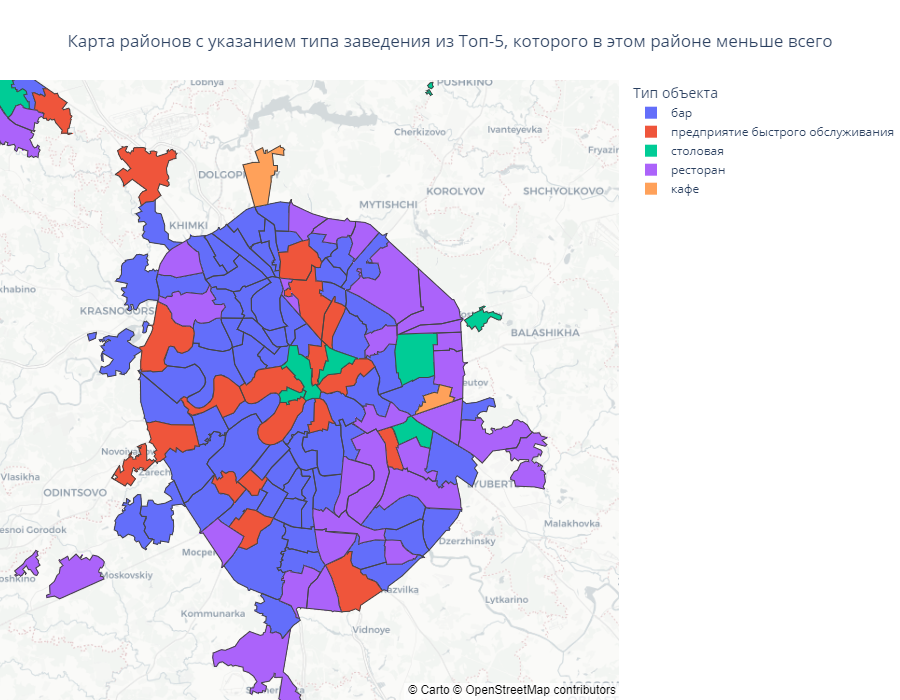

In [88]:
fig = px.choropleth_mapbox(district_type_grouped, geojson=counties, color="object_type",
                           locations="district", featureidkey="properties.NAME",
                           hover_name='district',
                           hover_data=['id'],
                           center={"lat": 55.7558, "lon": 37.6173},
                           mapbox_style="carto-positron", zoom=8.9,
                           title='Карта районов с указанием типа заведения из Топ-5, которого в этом районе меньше всего',
                           labels={'object_type':'Тип объекта', 'district':'Район', 'id': 'Количество заведений'}
                            )
fig.update_layout(
    title_x=0.5,
    title_y=0.95,
    margin={"l": 0, "r": 0, "b": 0, "t": 80}
)
fig.show()

***
### Вывод

В этой части мы провели анализ наши данных, совместив их с данными об объектах общественного питания, загруженными из внешнего источника.

Мы смогли показать самые популярные типы заведений в городе Москва, соотношение сетевых и несетевых заведений, оценили количество мест в них и посчитали среднее количество мест по типу заведения.

Также, мы сделали более глубокий анализ географического местоположения заведений: посмотрели на самые популярные улицы и районы, на районы с улицами с одним заведением, а также нарисовали тепловую карту районов с указанием того типа заведения из топ-5, которого не хватает в каждом районе.

Все это позволит нам сделать финальный вывод.

## Общий вывод

В данном проекте мы провели анализ объектов общественного питания по имеющимся данным, а также по внешним.

По результатам анализа количества заведений можем сказать:
1. Самыми многочисленными заведениями в г. Москва будут:
    * кафе
    * столовая
    * ресторан
    * фаст-фуд
    * бар
2. Из этих заведений с большой вероятностью сетевыми могут стать кафе, рестораны и фаст-фуд.
3. В топ по количеству мест попали:
    * столовая
    * ресторан
4. С другой стороны мы смогли показать, что у очень распространеннывх сетевых заведений медианное колчество мест не самое высокое. У сетей с 10-20 заведениями количество мест очень сильно варьируется.

Также, мы провели анализ географии заведений. Из него можно сделать вывод, что самыми популярными районами будут центральные районы Москвы - там больше всего заведений (а значит - конкуренция), но в связи с этим, судя по всему, и большая проходимость. В центральных же районах находится самое большое количество улиц с всего одним заведением.

Также мы смогли показать каких заведений из популярных типов не хватает в каждом районе. Поэтому рекомендации можно дать следующие:
* При цели открыть именно сетевое заведение лучше попробовать открыть предприятие быстрого обслуживания: заведений такого типа не хватает в центральных районах, но среднее количество мест у них невелико.
* В центральных районах также не хватает заведений типа "столовая" - заведения с самым большим средним количеством мест, но с маленькой распространенностью в качестве сетевого.
* Оптимальным вариантом может стать сетевое заведение ресторан в многочисленных спальных районах - там не хватает именно этого типа, а конкуренция будет меньше.

В любом случае данное исследование необходимо будет дополнить исследованием количества жителей в каждом районе, а также исследованием проходимости центральных районных улиц.